# Create a Classification Model
Ni Putu Intan Maharani

PwC Digital Intelligence Virtual Case Experience Participant

Dataset: Bank Marketing

## About the data
The data is about a direct marketing campaign (phone calls) of a Portuguese bank.

Customers' basic information and their decision (subscribed to a term deposit - yes or no) are recorded.

The goal of this model is to predict their decision after the calls.

## 1. Data Description

The dataset contains 41188 rows and 21 columns - 10 of the are numerical and 11 of them are categorical

In [110]:
import pandas as pd

origin = pd.read_csv('bank-additional-full.csv',sep = ';')

print(origin.dtypes)
origin.isnull().sum()
origin

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## 2. Data Preprocessing

### 2.1 Dealing with imbalanced classes

In [111]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
origin_balanced,origin_balanced['y'] = rus.fit_resample(origin[['age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']],origin['y'])

origin_balanced

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,33,technician,divorced,professional.course,no,no,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
1,38,admin.,divorced,basic.9y,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
2,34,blue-collar,single,basic.9y,no,yes,no,cellular,may,tue,...,1,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,no
3,32,admin.,married,university.degree,no,no,no,cellular,aug,fri,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
4,48,blue-collar,married,high.school,unknown,yes,no,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
9276,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
9277,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
9278,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### 2.2 Replace yes or no in y to 1 or 0

In [112]:
y_map = {'yes': 1, 'no': 0}
origin_balanced['y'] = origin_balanced['y'].map(y_map)
origin_balanced

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,33,technician,divorced,professional.course,no,no,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0
1,38,admin.,divorced,basic.9y,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,34,blue-collar,single,basic.9y,no,yes,no,cellular,may,tue,...,1,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,0
3,32,admin.,married,university.degree,no,no,no,cellular,aug,fri,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
4,48,blue-collar,married,high.school,unknown,yes,no,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,1
9276,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,1
9277,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
9278,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


### 2.3 Split the data into X (independent variables) and y (dependent variable)

In [113]:
y = origin_balanced.pop('y')
X = origin_balanced
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,33,technician,divorced,professional.course,no,no,no,telephone,jun,wed,128,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
1,38,admin.,divorced,basic.9y,no,no,no,cellular,nov,fri,71,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
2,34,blue-collar,single,basic.9y,no,yes,no,cellular,may,tue,483,1,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1
3,32,admin.,married,university.degree,no,no,no,cellular,aug,fri,133,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
4,48,blue-collar,married,high.school,unknown,yes,no,telephone,jun,thu,234,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,208,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6
9276,62,retired,married,university.degree,no,no,no,cellular,nov,thu,483,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6
9277,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
9278,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [114]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9275    1
9276    1
9277    1
9278    1
9279    1
Name: y, Length: 9280, dtype: int64

### 2.4 Create training and test set

In [115]:
seed = 50 # to ensure the result is reproducible

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = seed)

### 2.5 Create list of categorical variables to encode

In [116]:
X_train.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

Create a list of categorical variables

In [117]:
features_to_encode = list(X_train.select_dtypes(include = ['object']).columns)

Create a constructor to handle categorical features

In [118]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

col_trans = make_column_transformer((OneHotEncoder(), features_to_encode), remainder = 'passthrough')
# The remainder = 'passthrough' allows the constructor to ignore those variables that are not included 
# in features_to_encode

## 3. Train the Classifier

In [119]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(oob_score = True)

Make a pipeline to combine the classifier and the constructor created

In [120]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(col_trans, rf_classifier)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(oob_score=True))])

## 4. Perform Prediction

Predicted Class Labels

In [121]:
y_prediction = pipe.predict(X_test)
print(y_prediction)

[1 0 0 ... 1 0 1]


Actual Class Labels

In [122]:
print(y_test)

8383    1
4514    0
1824    0
5852    1
3624    0
       ..
8886    1
7998    1
1805    0
2584    0
7313    1
Name: y, Length: 3063, dtype: int64


## 5. Model Evaluation

In [123]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

### 5.1 Accuracy
Accuracy = (TP+TN) / (TP+TN+FP+FN)

In [124]:
accuracy = accuracy_score(y_test, y_prediction)

print(f"The accuracy of the model is {round(accuracy,3)*100}%")

The accuracy of the model is 87.8%


### 5.2 Probability Predictions
pipe.predict_proba(X_train)[:,1] -> this gives the predicted probability distribution of class label 1 from the dataframe which is important to calculate ROC_AUC score.

Why label 1? See sklearn.metrics.roc_auc_score

In [125]:
train_probs = pipe.predict_proba(X_train)[:,1]
probs = pipe.predict_proba(X_test)[:,1]

train_predictions = pipe.predict(X_train)

In [126]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.9344913003253051


Plot the ROC Curve

In [127]:
import numpy as np
import matplotlib.pyplot as plt

In [128]:
def evaluate_model(y_pred, probs, train_predictions, train_probs):
    baseline = {}
    baseline['recall']=recall_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    results = {}
    results['recall'] = recall_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred)
    results['roc'] = roc_auc_score(y_test, probs)
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    for metric in ['recall', 'precision', 'roc']:  
          print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
     # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

Recall Baseline: 1.0 Test: 0.92 Train: 1.0
Precision Baseline: 0.5 Test: 0.85 Train: 1.0
Roc Baseline: 0.5 Test: 0.93 Train: 1.0


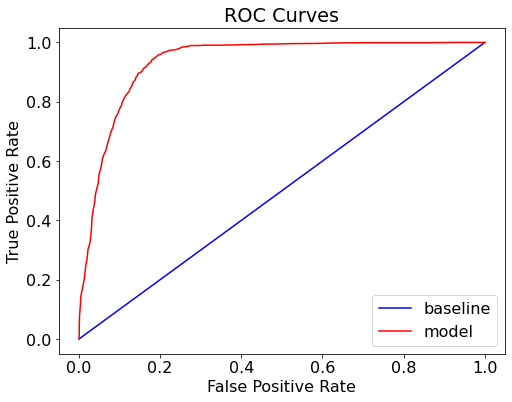

In [129]:
evaluate_model(y_prediction, probs, train_predictions, train_probs)

### 5.3 Confusion matrix

In [130]:
# Simple way
print(confusion_matrix(y_test, y_prediction))

[[1273  257]
 [ 117 1416]]


In [131]:
# Let's plot the confusion matrix
# Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
# https://towardsdatascience.com/my-random-forest-classifier-cheat-sheet-in-python-fedb84f8cf4f
import itertools

def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
             fontsize = 20,
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

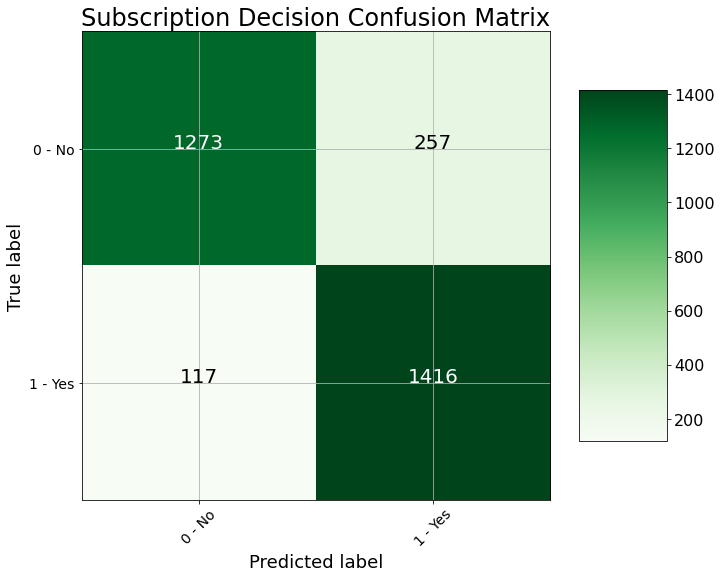

In [132]:
conf_matrix = confusion_matrix(y_test, y_prediction)
plot_confusion_matrix(conf_matrix, classes = ['0 - No', '1 - Yes'], title = "Subscription Decision Confusion Matrix")

## 6. Feature Importance
To inspect how many feature importance values are there in the model

In [133]:
print(rf_classifier.feature_importances_)
print(f" There are {len(rf_classifier.feature_importances_)} features in total")

[8.54287763e-03 7.69687604e-03 3.89528436e-03 2.10994047e-03
 4.92966693e-03 3.94923353e-03 2.88111169e-03 4.87599795e-03
 3.87051546e-03 6.91495511e-03 2.62592749e-03 7.10043811e-04
 5.72342506e-03 8.48787599e-03 8.35579550e-03 2.57716507e-04
 4.51622729e-03 3.59596945e-03 6.90627699e-03 7.64592423e-03
 3.82344648e-04 5.47957365e-03 9.42060659e-03 3.38816283e-03
 6.30323052e-03 6.14805940e-03 8.76306635e-03 1.56353151e-03
 9.04186642e-03 6.55293128e-03 1.31613498e-03 6.33977584e-03
 9.19632757e-03 1.16739533e-02 4.28104317e-03 2.30489396e-03
 6.11933721e-04 2.32069052e-03 2.56191272e-03 4.30043966e-03
 9.15976469e-03 2.60462324e-03 4.54155533e-03 1.08194621e-03
 7.81116492e-03 8.57371342e-03 7.96835731e-03 7.07952130e-03
 7.61244152e-03 4.50531197e-03 8.52036802e-03 1.21656921e-02
 5.47858940e-02 3.48692402e-01 2.79080297e-02 1.62168841e-02
 1.05232202e-02 4.26305908e-02 2.68660888e-02 3.12528012e-02
 8.03048972e-02 7.87526115e-02]
 There are 62 features in total


There are 62 features in total where we only have 20 columns in X_train. 

Why? this is because our model (pipe) encodes the categorical variables in X_train. For instance, the marital column in X_train is transformed into 4 columns (i.e., married, single, divorced, unknown)

In [134]:
# Let's look at the first row
print(col_trans.fit_transform(X_train)[0,:])

[ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00  0.0000e+00
  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
  0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
  0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
  1.0000e+00  0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00
  0.0000e+00  0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00  0.0000e+00
  0.0000e+00  0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
  0.0000e+00  0.0000e+00  1.0000e+00  0.0000e+00  3.7000e+01  2.9200e+02
  3.0000e+00  9.9900e+02  0.0000e+00 -1.8000e+00  9.3876e+01 -4.0000e+01
  6.8200e-01  5.0087e+03]


In [135]:
# And the first row of X_train
X_train.iloc[0,:]

age                        37
job                management
marital               married
education         high.school
default                    no
housing                    no
loan                       no
contact              cellular
month                     may
day_of_week               fri
duration                  292
campaign                    3
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate             -1.8
cons.price.idx         93.876
cons.conf.idx           -40.0
euribor3m               0.682
nr.employed            5008.7
Name: 8477, dtype: object

### 6.1 Encoded X_train

In [136]:
def encode_and_bind(original_dataframe, features_to_encode):
    dummies = pd.get_dummies(original_dataframe[features_to_encode])
    res = pd.concat([dummies, original_dataframe], axis=1)
    res = res.drop(features_to_encode, axis=1)
    return(res)

In [137]:
X_train_encoded = encode_and_bind(X_train, features_to_encode) 
# encode_and_bind function encodes the categorical variables and then combine them with the original dataframe

In [138]:
X_train_encoded

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
8477,0,0,0,0,1,0,0,0,0,0,...,37,292,3,999,0,-1.8,93.876,-40.0,0.682,5008.7
5115,1,0,0,0,0,0,0,0,0,0,...,53,815,1,999,0,1.4,93.918,-42.7,4.962,5228.1
6919,0,0,0,0,0,0,0,1,0,0,...,34,562,2,999,0,-1.8,92.893,-46.2,1.250,5099.1
1030,0,0,0,0,0,0,0,0,0,1,...,33,162,6,999,0,1.4,93.918,-42.7,4.963,5228.1
3703,0,0,0,0,0,0,0,0,0,1,...,41,107,1,999,0,1.1,93.994,-36.4,4.856,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8262,0,0,0,0,0,1,0,0,0,0,...,64,139,2,6,1,-1.8,93.369,-34.8,0.652,5008.7
6214,1,0,0,0,0,0,0,0,0,0,...,37,135,1,999,0,-1.8,93.075,-47.1,1.415,5099.1
8324,0,0,0,0,0,0,0,0,1,0,...,38,248,1,3,4,-1.8,93.369,-34.8,0.639,5008.7
6253,1,0,0,0,0,0,0,0,0,0,...,29,678,1,999,0,-1.8,93.075,-47.1,1.405,5099.1


### 6.2 Feature Importances

In [139]:
feature_importances = list(zip(X_train_encoded, rf_classifier.feature_importances_))

# Sort the feature importances by the most important first
feature_importances_sorted = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print it out
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_sorted];

Feature: duration                            Importance: 0.34869240224686787
Feature: euribor3m                           Importance: 0.08030489721914774
Feature: nr.employed                         Importance: 0.0787526115121236
Feature: age                                 Importance: 0.05478589401197813
Feature: emp.var.rate                        Importance: 0.042630590795159316
Feature: cons.conf.idx                       Importance: 0.03125280119966746
Feature: campaign                            Importance: 0.027908029733852112
Feature: cons.price.idx                      Importance: 0.026866088820910305
Feature: pdays                               Importance: 0.016216884083982253
Feature: poutcome_success                    Importance: 0.012165692140771948
Feature: contact_telephone                   Importance: 0.01167395329146922
Feature: previous                            Importance: 0.010523220179725457
Feature: education_university.degree         Importance: 0.009420606590

Plot the top 25 feature importance

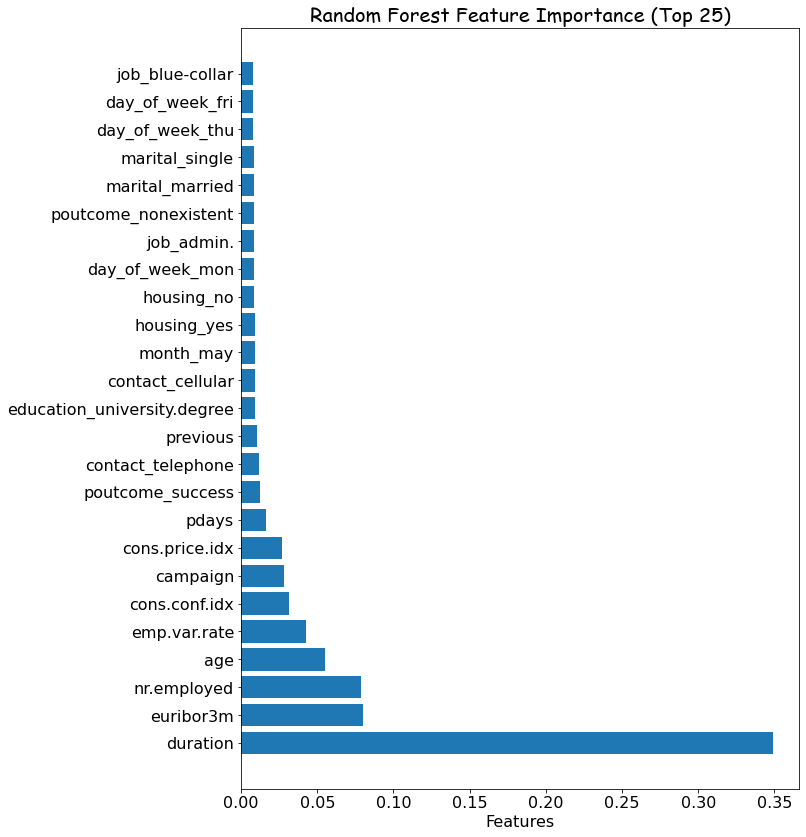

In [140]:
feature_names_25 = [i[0] for i in feature_importances_sorted[:25]]
y_ticks = np.arange(0, len(feature_names_25))
x_axis = [i[1] for i in feature_importances_sorted[:25]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_25, x_axis)   #horizontal barplot
plt.title('Random Forest Feature Importance (Top 25)',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()

## 7. Tune the Classifier (TODO)
Good source: https://towardsdatascience.com/my-random-forest-classifier-cheat-sheet-in-python-fedb84f8cf4f

## 8. Additional Tasks 
(from PwC Digital Intelligence Virtual Case - Responsible AI module)

- Analyse the model and provide insight into which features/variables influence the outcome of the classification the most: on a global level, and specifically for observation #4 and #20

In [145]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,33,technician,divorced,professional.course,no,no,no,telephone,jun,wed,128,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
1,38,admin.,divorced,basic.9y,no,no,no,cellular,nov,fri,71,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
2,34,blue-collar,single,basic.9y,no,yes,no,cellular,may,tue,483,1,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1
3,32,admin.,married,university.degree,no,no,no,cellular,aug,fri,133,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
4,48,blue-collar,married,high.school,unknown,yes,no,telephone,jun,thu,234,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,208,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6
9276,62,retired,married,university.degree,no,no,no,cellular,nov,thu,483,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6
9277,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
9278,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [148]:
X.iloc[3]

age                              32
job                          admin.
marital                     married
education         university.degree
default                          no
housing                          no
loan                             no
contact                    cellular
month                           aug
day_of_week                     fri
duration                        133
campaign                          2
pdays                           999
previous                          0
poutcome                nonexistent
emp.var.rate                    1.4
cons.price.idx               93.444
cons.conf.idx                 -36.1
euribor3m                     4.963
nr.employed                  5228.1
Name: 3, dtype: object

In [155]:
# Prediction on observation #4
# TODO